Yuval Shimon   
Maman 11 - Question 4

In [41]:
# question 4 - image blending
# imports and images
import cv2
import numpy as np
import matplotlib.pyplot as plt

cat_img = cv2.imread("cat.jpg")
dolphin_img = cv2.imread("dolphin.jpg")

In [42]:
# helpers methods - calculating laplacian and gaussain pyramids


def calc_gaussain_pyramid(img, iterations):
    # generate Gaussian pyramid for apple
    img_ = img.copy()  # create a copy of the apple image
    img_pyr = [img_]  # placing original image as first in the list
    for _ in range(iterations):
        img_ = cv2.pyrDown(
            img_
        )  # this function performs the downsampling step of the Gaussian pyramid
        img_pyr.append(img_)
    return img_pyr


def calc_laplacian_pyramid(gaussain_pyramid):
    last_img = gaussain_pyramid[-1]  # last image in the pyramid
    img_pyr = [last_img]
    for i in range(len(gaussain_pyramid) - 1, 0, -1):  # reverse the pyramid
        expended = cv2.pyrUp(gaussain_pyramid[i])  # upscale the image
        # the laplacian pyramid is created by the difference between gaussian and extended level to its upper level, therefore we subtract the levels
        laplacian_img = cv2.subtract(gaussain_pyramid[i - 1], expended)
        img_pyr.append(laplacian_img)
    return img_pyr


def plot_pyramid(pyramid, title="Laplacian"):
    """
    Plot a pyramid by looping over the figures in the pyramid array and  drawing it
    """
    for i in range(len(pyramid)):
        plt.figure(figsize=(30, 30))
        plt.subplot(len(pyramid) + 1, 1, i + 1)
        plt.title(f"{title} [level={i}]")
        plt.imshow(pyramid[i])
        plt.axis("off")
    plt.show()

In [43]:
# calculating the images laplacian and gaussian pyramids
num_iterations = 5
cat_gaussian = calc_gaussain_pyramid(cat_img, num_iterations)
dolphin_gaussian = calc_gaussain_pyramid(dolphin_img, num_iterations)

cat_laplacian = calc_laplacian_pyramid(cat_gaussian)
dolphin_laplacian = calc_laplacian_pyramid(dolphin_gaussian)

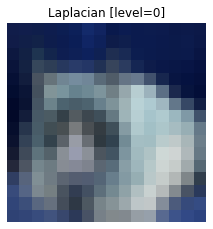

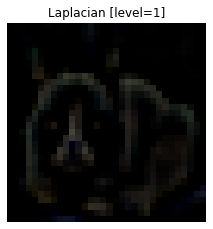

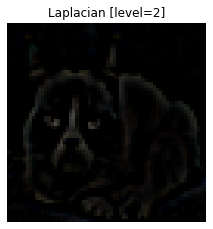

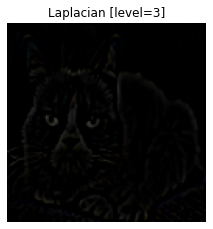

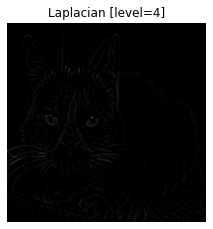

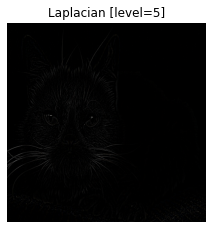

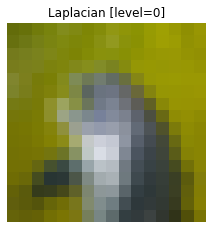

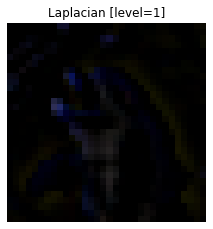

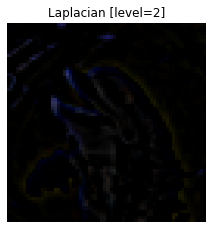

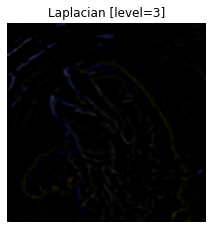

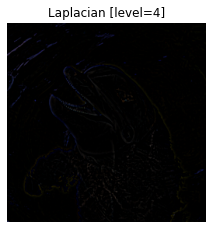

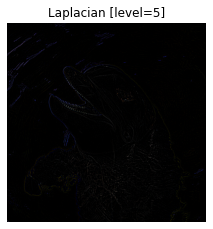

In [44]:
# 4 a plotting laplacian pyramid
plot_pyramid(cat_laplacian)
plot_pyramid(dolphin_laplacian)

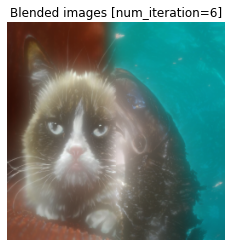

In [45]:
# 4 b showing merged images
# merging both photos
merge_pyramid = []
for img1_lap, img2_lap in zip(cat_laplacian, dolphin_laplacian):
    cols, rows, ch = img2_lap.shape  # get the shape of
    laplacian = np.hstack(
        (img1_lap[:, : int(cols / 2)], img2_lap[:, int(cols / 2) :])
    )  # creating a new img from appending half of the first image laplacian and half of the second image laplacian
    merge_pyramid.append(laplacian)

# reconstructing the image
# now reconstructing our image using pyrUp and stating pyramid levels
reconstructed_image = merge_pyramid[0]
for i in range(1, num_iterations):
    reconstructed_image = cv2.pyrUp(reconstructed_image)  # upsample image
    reconstructed_image = cv2.add(merge_pyramid[i], reconstructed_image)

plt.imshow(reconstructed_image[:, :, ::-1])
plt.axis("off")
plt.title(f"Blended images [num_iteration={num_iterations+1}]")
plt.show()